In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification


In [2]:
#@title Figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


In [3]:
#@title Plotting Functions

def plot_weights(models, sharey=True):
  """Draw a stem plot of weights for each model in models dict."""
  n = len(models)
  f = plt.figure(figsize=(10, 2.5 * n))
  axs = f.subplots(n, sharex=True, sharey=sharey)
  axs = np.atleast_1d(axs)

  for ax, (title, model) in zip(axs, models.items()):

    ax.margins(x=.02)
    stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
    stem[0].set_marker(".")
    stem[0].set_color(".2")
    stem[1].set_linewidths(.5)
    stem[1].set_color(".2")
    stem[2].set_visible(False)
    ax.axhline(0, color="C3", lw=3)
    ax.set(ylabel="Weight", title=title)
  ax.set(xlabel="Features")
  f.tight_layout()

def func_err(w, lam, q):
    return 0.5*lam*(np.abs(w)**q)


In [4]:
# Simulating some data with a lot of features for an example
x, y = make_classification(
    n_samples=100,
    n_features=600,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)



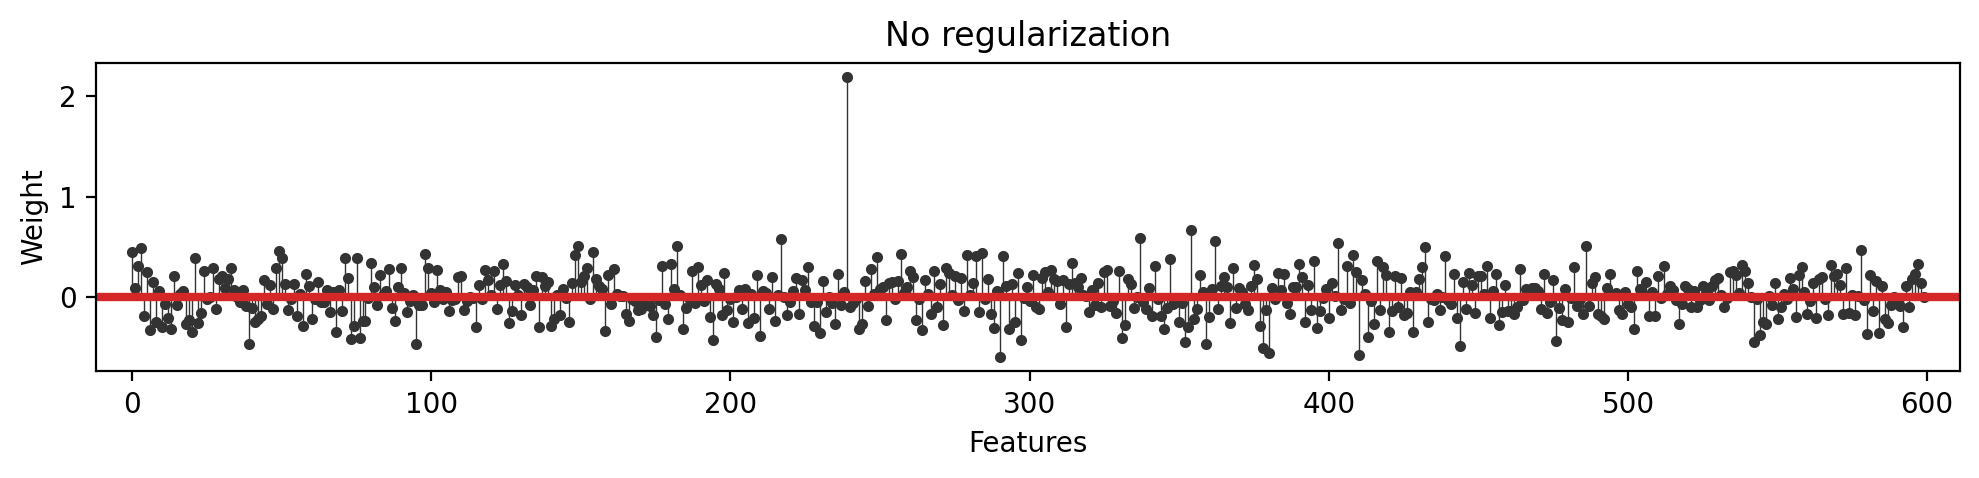

In [17]:
log_reg = LogisticRegression(penalty="none").fit(x, y)
plot_weights({"No regularization": log_reg})

plt.savefig('No_reg.png')

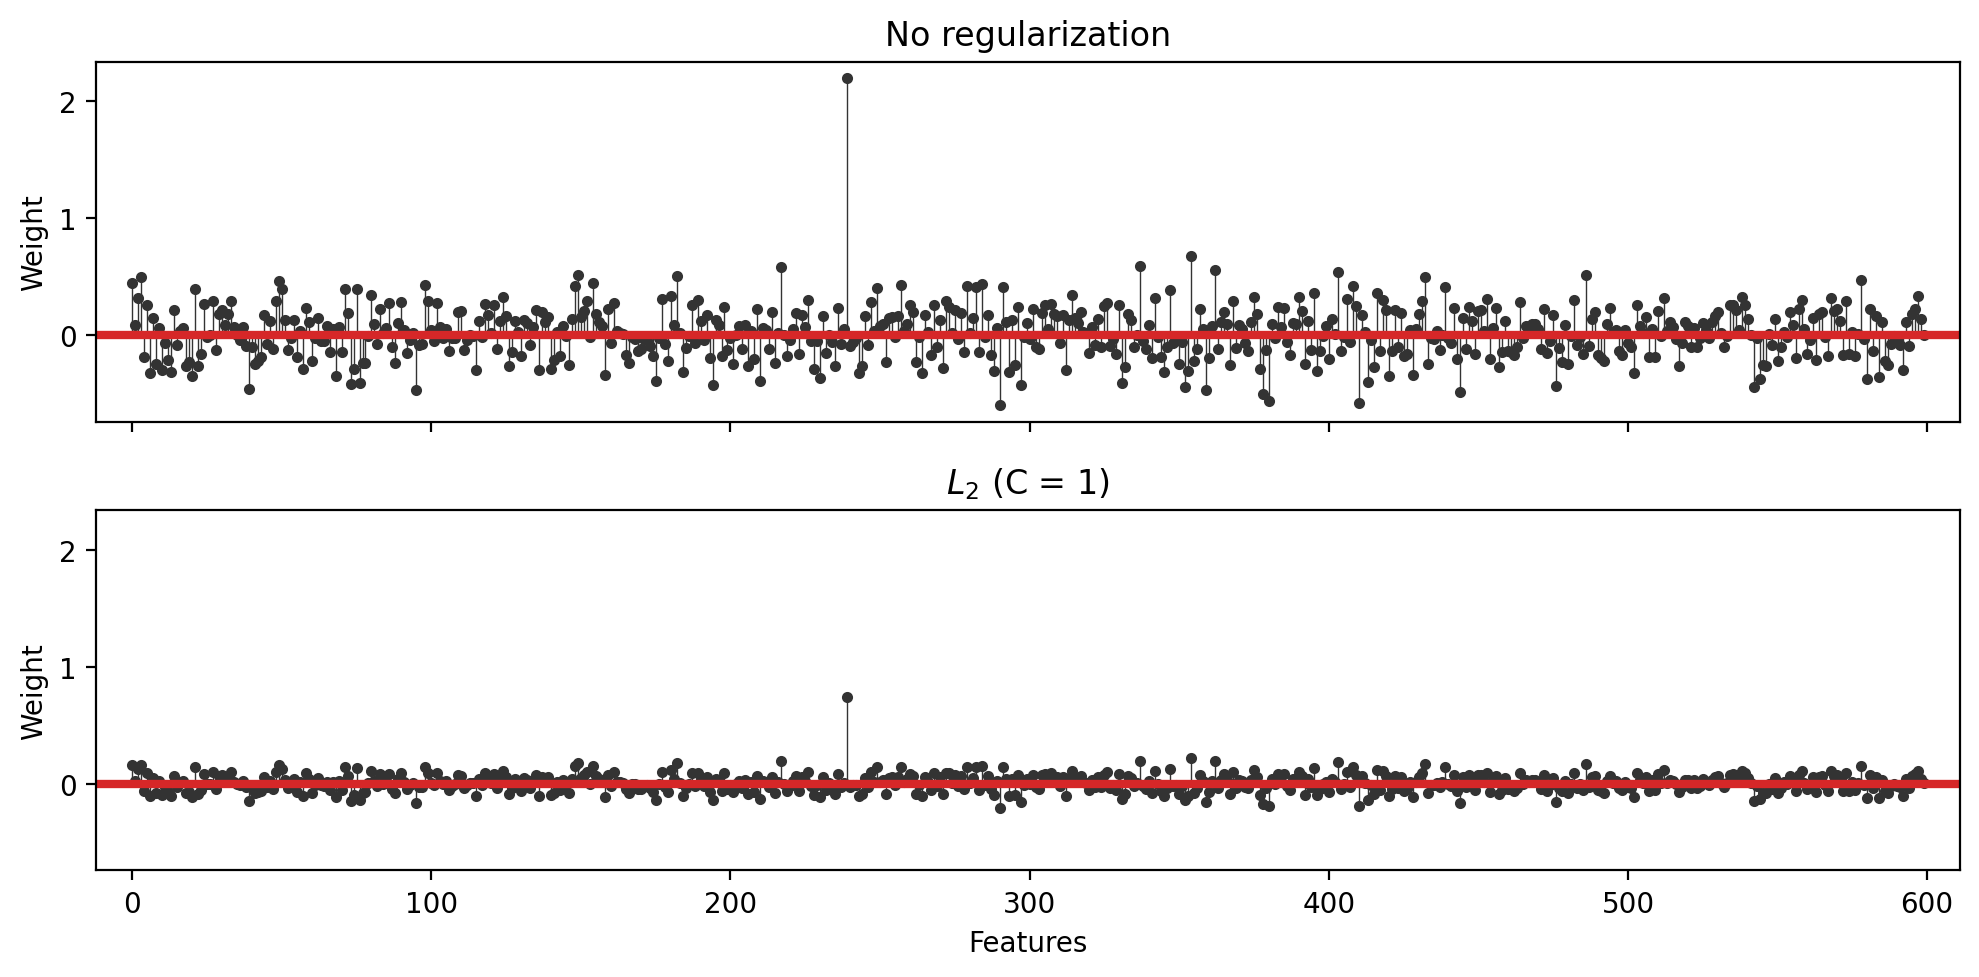

In [19]:
log_reg_l2 = LogisticRegression(penalty="l2", C=1).fit(x, y)

# now show the two models
models = {
  "No regularization": log_reg,
  "$L_2$ (C = 1)": log_reg_l2,
}
plot_weights(models)

In [ ]:
plot_weights(models, sharey=False)

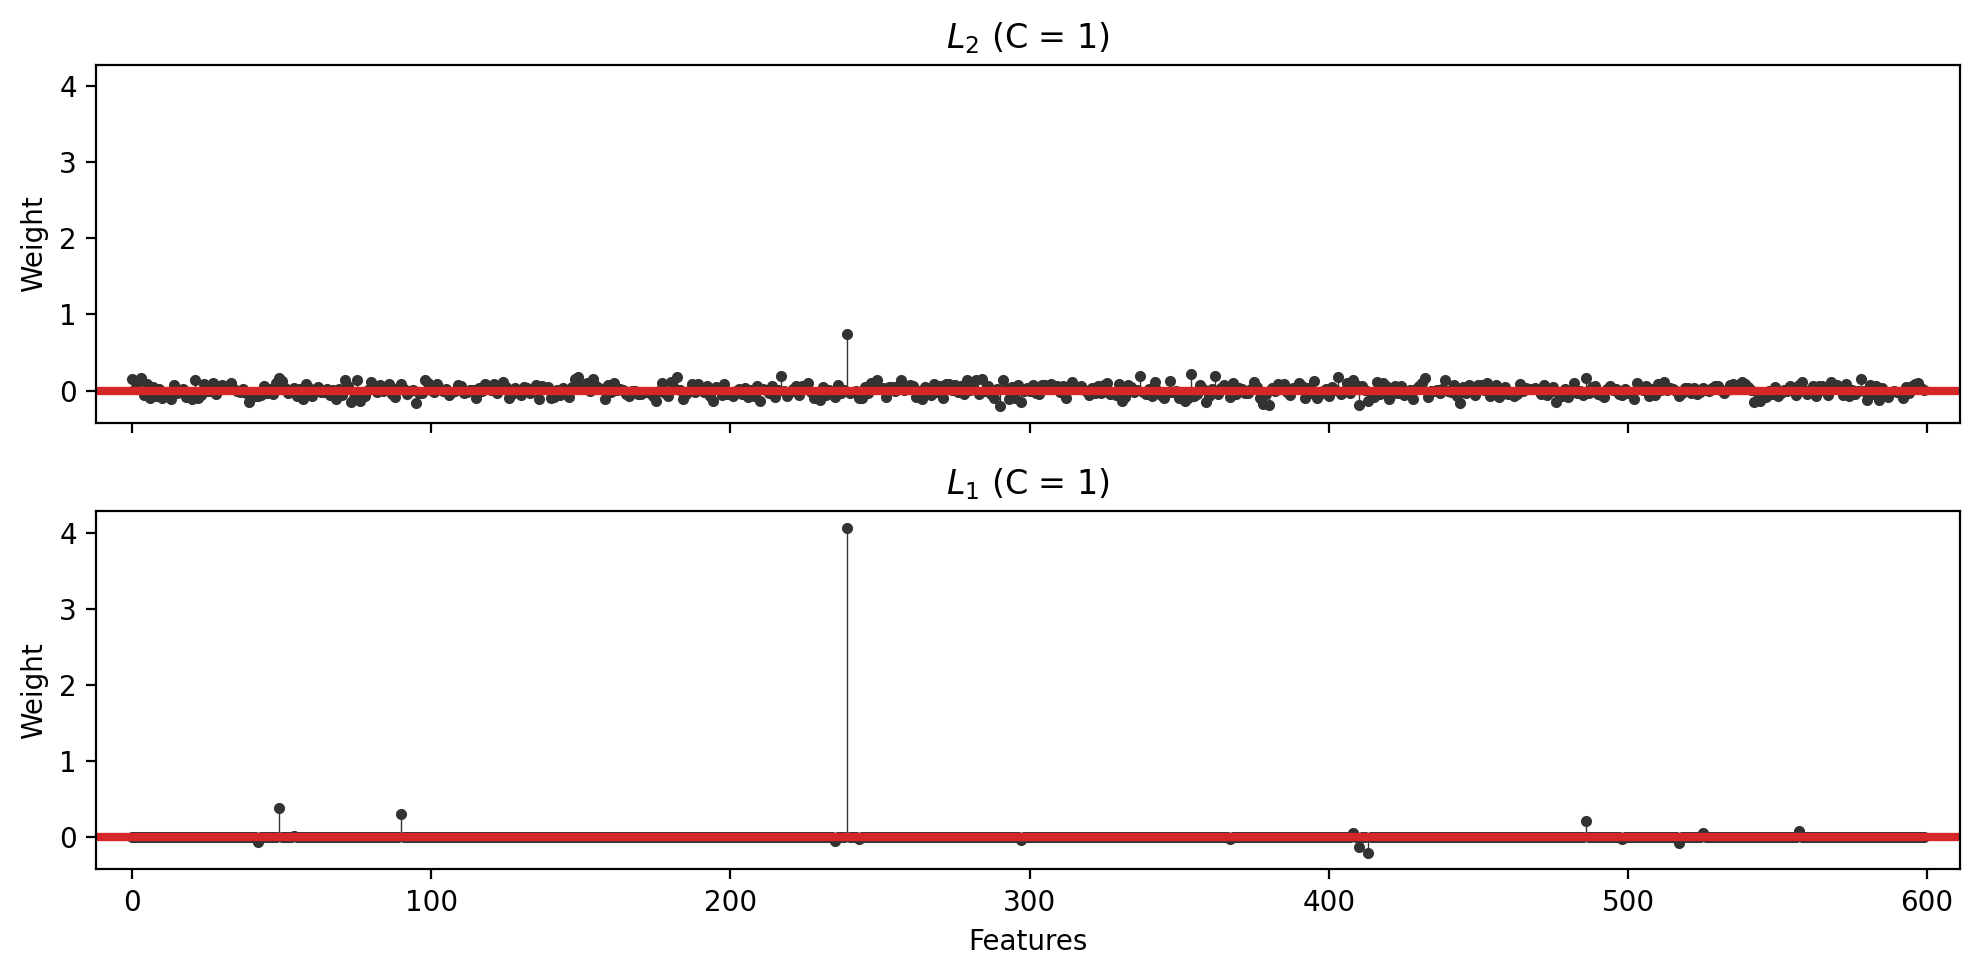

In [20]:
log_reg_l1 = LogisticRegression(penalty="l1", C=1, solver="saga", max_iter=5000)
log_reg_l1.fit(x, y)
models = { 
  "$L_2$ (C = 1)": log_reg_l2,
  "$L_1$ (C = 1)": log_reg_l1,
}
plot_weights(models)
plt.savefig('L1_L2.png')

In [5]:
w_= np.arange(0,2,0.1)

lambdas = np.arange(0,1,0.2)

q_ = 1

plt.figure()

for i, l in enumerate(lambdas):
    plt.plot(w_, func_err(w_, l, q_), label=f'lambda = {np.round(l,2)}')
    
plt.legend()
plt.xlabel('Value of w')
plt.ylabel('Value of lambda E(w)')
plt.title('Different lambdas with q = 1')
plt.savefig('different_lambdas_1.png')

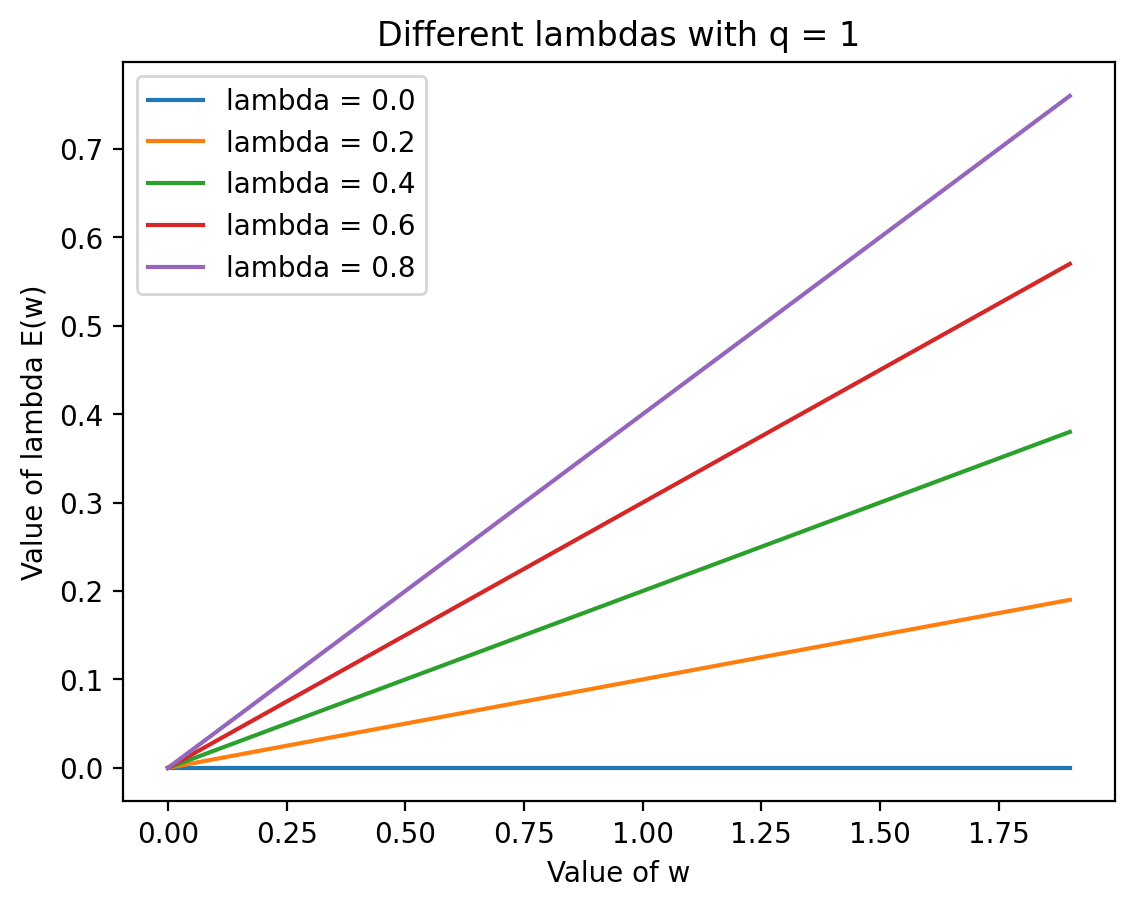

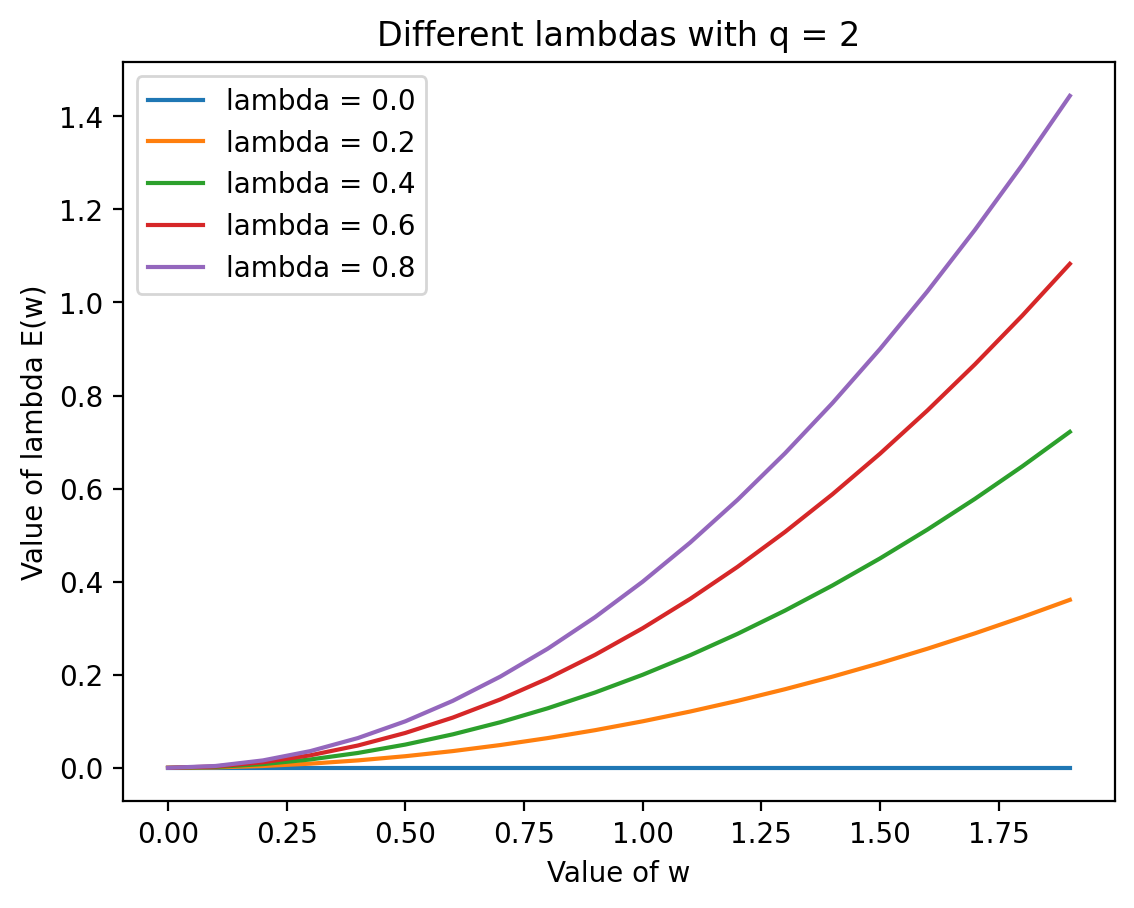

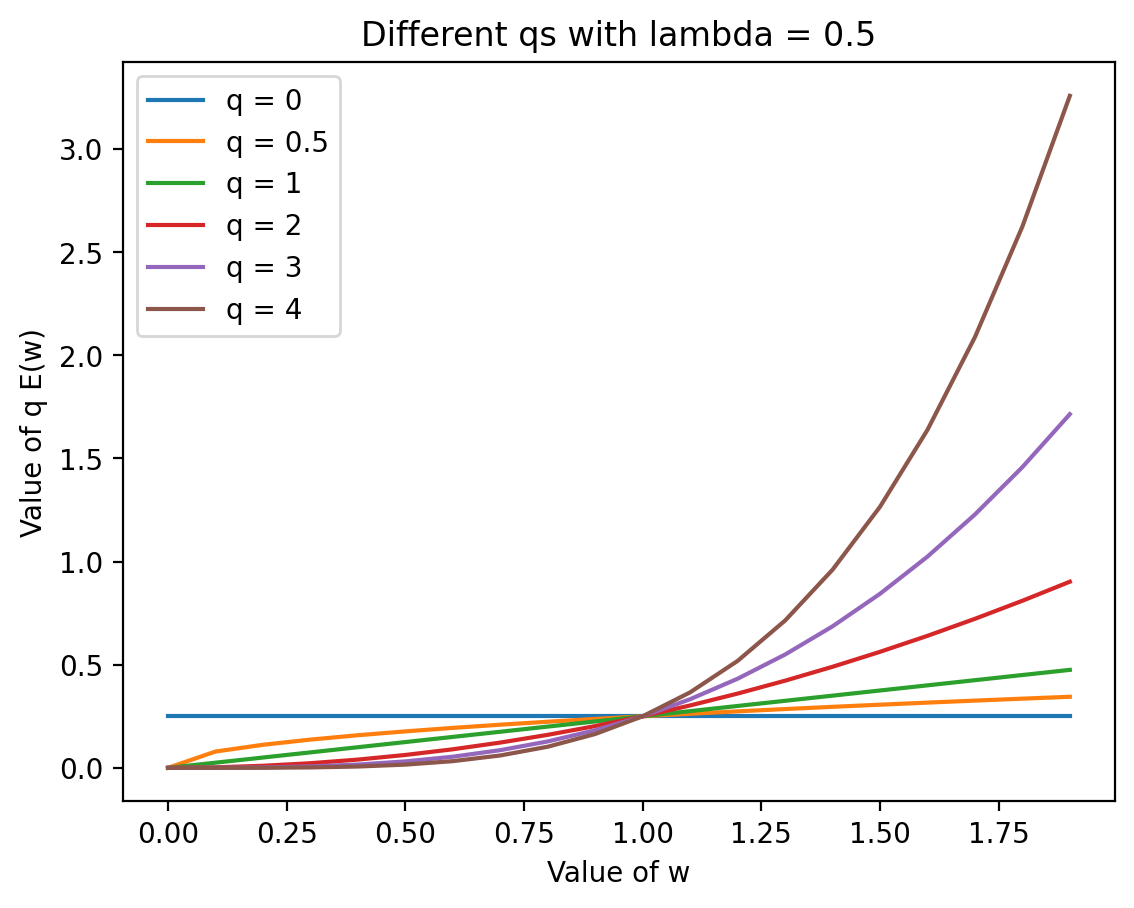

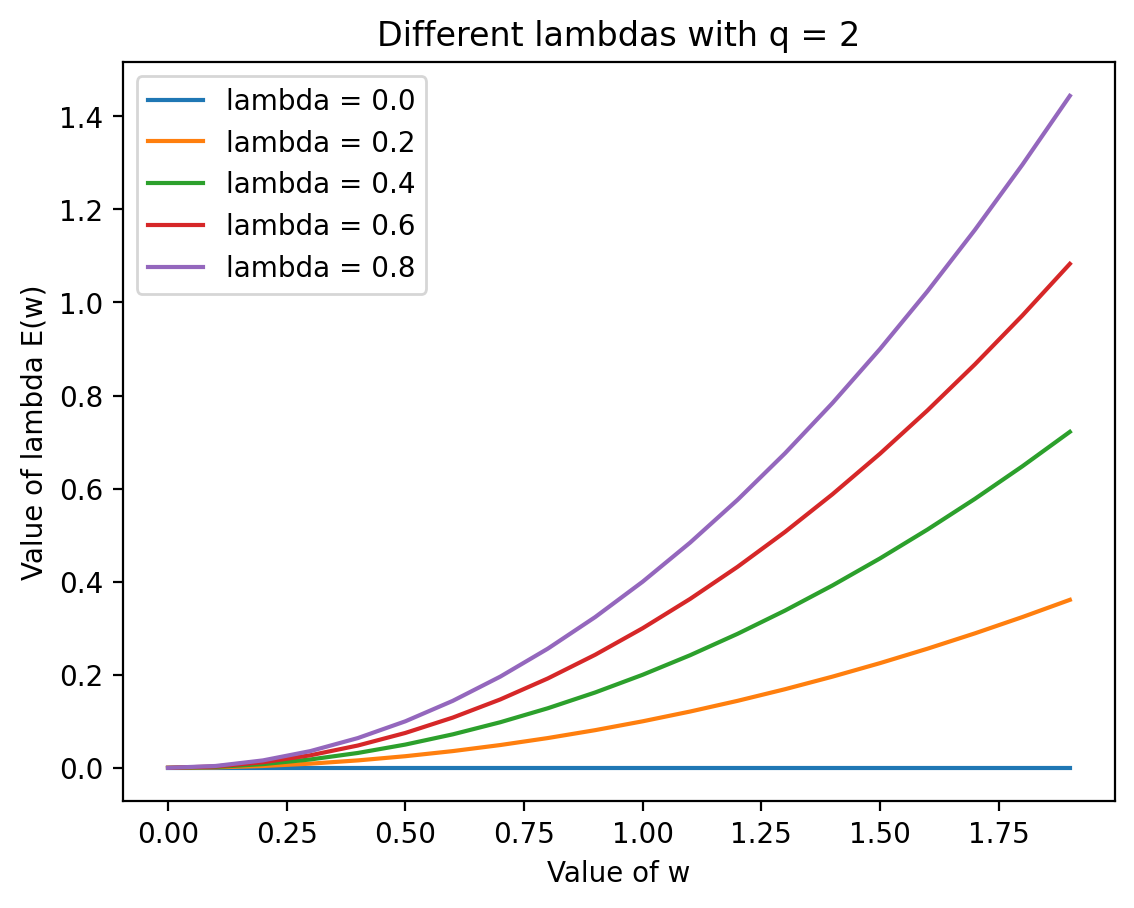

In [8]:
w_= np.arange(0,2,0.1)

lambdas = np.arange(0,1,0.2)
qs = [0, 0.5, 1, 2, 3, 4]

# colors = ['r', 'b', 'g', 'k', 'm', 'orange', ]
plt.figure()
q_ = 2
for i, l in enumerate(lambdas):
    plt.plot(w_, func_err(w_, l, q_), label=f'lambda = {np.round(l,2)}')
    
plt.legend()
plt.xlabel('Value of w')
plt.ylabel('Value of lambda E(w)')
plt.title('Different lambdas with q = 2')
plt.savefig('different_lambdas_2.png')
plt.show()

In [7]:
plt.figure()
l_ = 0.5
for i, q in enumerate(qs):
    plt.plot(w_, func_err(w_, l_, q), label=f'q = {q}')
    
plt.legend()
plt.xlabel('Value of w')
plt.ylabel('Value of q E(w)')
plt.title('Different qs with lambda = 0.5')
plt.savefig('different_qs.png')